# Homework 2
In this homework we look at a (naive but we will get better) way of computing homographies between
images

<img src="HW2_image1.jpg" alt="Image 1" style="width:300px; height:300px;">
<img src="HW2_image2.jpg" alt="Image 2" style="width:300px; height:300px;">


In [1]:
%matplotlib qt
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

: 

1. image1 shows a picture on a wall. Our goal is to replace that picture with image2.
In order to do this we will compute the H matrix that defines the transformation between the two
images and then map image2 in place on image1.

In [3]:
def select_points(im, points):


    """

    returns points on an image manually by clicking anywhere

    Args : 
    - im : image to be selected
    - points: numbver of the points want to select

    Returns (list) :
    - x, y coordinates of the seelcted points
    """
    
    image1 = cv2.imread(im)
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.title("Select 4 corresponding points in Image")
    plt.axis('image')
    plt.grid(True)
    plt.show()

    pts_image = plt.ginput(n=points)
    plt.close()
    return pts_image

In [ ]:
# pts_src = np.array([[534, 502],
#                     [931, 462],
#                     [566, 1090],
#                     [958, 1145],
#                     [376, 301],
#                     [1087, 161],
#                     [1129, 1427],
#                     [434,1267]]
#                     )

In [52]:
pts_image1 = select_points(im = "HW2_image1.jpg", points = 4) # image with the Frame
pts_image2 = select_points(im = "HW2_image2.jpg", points = 4) # image to be projected

pts_src = np.array(pts_image2)
pts_dest = np.array(pts_image1)


In [5]:
def compute_homography(pts_src, pts_dest):


    """
    computes the homography between two images, based on the points selected manually from the
    **select_points** function

    Args:
    - pts_src : points from the source image, on which is to be warped onto another image
    - pts dest : points from the destination image, onto which the image is to be warped

    Returns:
    - H(homography matrix) : 3x3 matrix containing homography between the two images
    """

    A = []

    for i in range(len(pts_src)):
        x_s, y_s = pts_src[i]
        x_d, y_d = pts_dest[i]
        A.append([-x_s, -y_s, -1, 0, 0, 0, x_s * x_d, y_s * x_d, x_d]) 
        A.append([0, 0, 0, -x_s, -y_s, -1, x_s * y_d, y_s * y_d, y_d])

    A = np.array(A)
    U, S, Vt = np.linalg.svd(A)
    H = Vt[-1].reshape(3, 3)

    return H


#Compute the homography matrix using the custom function
H_custom = compute_homography(pts_src, pts_dest)

# Compute the homography matrix using cv2.findHomography
import cv2
H_cv2, status = cv2.findHomography(pts_src, pts_dest)

# Compare the two matrices
print("Custom Homography Matrix:")
print(H_custom)

print("\ncv2 Homography Matrix:")
print(H_cv2)

# Check if the matrices are close
if np.allclose(H_custom, H_cv2, rtol=1e-4):
    print("\nThe matrices are close.")
else:
    print("\nThe matrices are not close.")


In [65]:
def combine_via_mask(src, dest, mask):
    #https://stackoverflow.com/questions/51365126/combine-2-images-with-mask
    combined = dest.copy()
    combined[np.where(mask == 255)] = src[np.where(mask == 255)]
    return combined

In [66]:
image1 = cv2.imread("HW2_image1.jpg")
image2 = cv2.imread("HW2_image2.jpg")

height, width = image1.shape[:2]
# H = np.array([[ 6.24168381e-01,  1.14361671e-01,  5.15000000e+02],
#        [-2.51647571e-01,  1.46434510e+00,  4.82000000e+02],
#        [-3.42718689e-04,  6.52478816e-05,  1.00000000e+00]])

# Warp image2 using the computed homography H
im_out = cv2.warpPerspective(image2, H_custom, (width, height), borderMode=cv2.BORDER_TRANSPARENT)

# Now, im_out contains image2 warped onto image1 using the computed homography H
cv2.imshow("Warped Image", im_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [68]:
black_mask = cv2.inRange(im_out, 0, 0)
im_mask = cv2.bitwise_not(black_mask)
combined = combine_via_mask(im_out, image1, im_mask) 
plt.imshow(combined)
cv2.imwrite('photo_replace_4pts.jpg', combined)

True

<img src="photo_replace_4pts.jpg" alt="Image 3" style="width:300px; height:300px;">


# 2. 
Given what we learned about homographies and how they warp images can you pick four additional points from the two images. How would you modify the computation of the H matrix when you have an over constrained problem (8 points as opposed to 4). Recompute H with these 8 points and comment on the differences in the H matrix. Map another image (of your own – please keep it PG-13) on image1 with this new homography.

In [71]:
pts_image1 = select_points(im = "HW2_image1.jpg", points = 8)
pts_image2 = select_points(im = 'sanju.jpg', points = 8)


In [9]:
def compute_homography(pts_src, pts_dest):
    A = []
    for i in range(len(pts_src)):
        x_s, y_s = pts_src[i]
        x_d, y_d = pts_dest[i]
        A.append([-x_s, -y_s, -1, 0, 0, 0, x_s * x_d, y_s * x_d, x_d])
        A.append([0, 0, 0, -x_s, -y_s, -1, x_s * y_d, y_s * y_d, y_d])

    A = np.array(A)
    
    # Solve using least-squares optimization
    _, _, Vt = np.linalg.svd(A)
    H = Vt[-1].reshape(3, 3)

    return H

# Define 8 source and destination points (make sure to pick meaningful points)
# pts_src = np.array(pts_image2)
# pts_dest = np.array(pts_image1)

# # Compute the homography matrix using the custom function with 8 points
# H_custom_8_points = compute_homography(pts_src, pts_dest)
# H_cv2, _ = cv2.findHomography(pts_src, pts_dest)

# # Print the new homography matrix
# print("Custom Homography Matrix with 8 points:")
# print(H_custom_8_points)


In [74]:
image1 = cv2.imread("HW2_image1.jpg")
image2 = cv2.imread("sanju.jpg")

height, width = image1.shape[:2]
# H = np.array([[ 6.24168381e-01,  1.14361671e-01,  5.15000000e+02],
#        [-2.51647571e-01,  1.46434510e+00,  4.82000000e+02],
#        [-3.42718689e-04,  6.52478816e-05,  1.00000000e+00]])

# Warp image2 using the computed homography H
im_out = cv2.warpPerspective(image2, H_custom_8_points, (width, height), borderMode=cv2.BORDER_TRANSPARENT)

# Now, im_out contains image2 warped onto image1 using the computed homography H
cv2.imshow("Warped Image", im_out)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [75]:
black_mask = cv2.inRange(im_out, 0, 0)
im_mask = cv2.bitwise_not(black_mask)
combined = combine_via_mask(im_out, image1, im_mask) 
plt.imshow(combined)
cv2.imwrite('photo_replace_8pts.jpg', combined)

True

Using 8 points for computing the homography matrix can improve the accuracy, robustness, and stability of the transformation estimation, especially in cases where there is perspective distortion or when dealing with real-world scenes that may not be perfectly planar. However, it's important to ensure that the chosen points are accurately matched and that outliers are properly handled during the computation.






<img src="photo_replace_8pts.jpg" alt="Image 1" style="width:300px; height:300px;">


# 3
Can you now take multiple images (five?) and stitch them together into a mosaic. Try
and stand in a spot and rotate the camera to take multiple overlapping images and then
compute the homographies and map the images onto each other while blending them.
Please do this for a scene where have a certain distance between yourself and the scene.
Doing it indoors is going to make it really hard on you. Please do it outside!
Again we are hand picking four points (or more) common across each image.

![Alt text](image.png)

Think about how you would pick the points – collinearity, spacing etc.

According to what I observed the points should all not lie on the same line, and should not be clustered nearby, and should be distributed over the image, getting a panaroma with 4 points is difficult, because the points are necesarily not far from each other, ina  panaroma, of a distant object, more points would solve that issue, and make the system robust

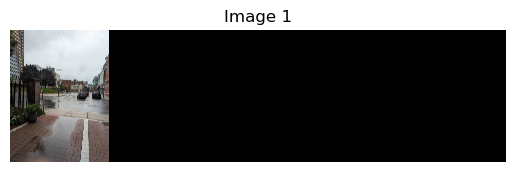

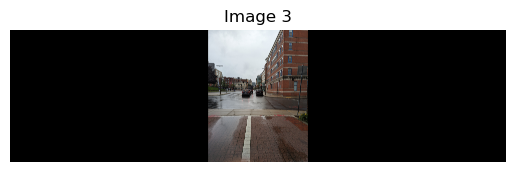

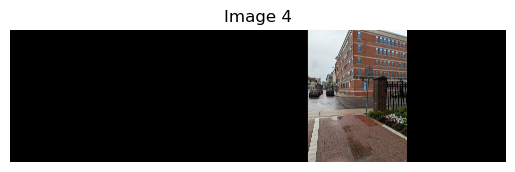

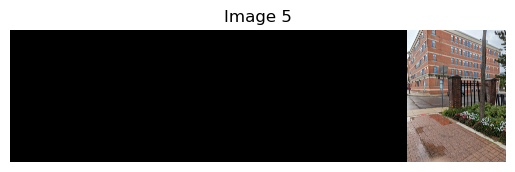

In [16]:
def process_images_and_save(source_dir, output_dir, padding_factors):
    part_cv_images = []

    for i in range(1, 6):
        file_path = f'{source_dir}/{i}.jpg'
        img = cv2.imread(file_path)

        if img is None:
            print(f"Failed to read image: {file_path}")
            continue

        left_padding = padding_factors[i][0] * img.shape[1]
        right_padding = padding_factors[i][1] * img.shape[1]

        # Add padding to the sides of the images
        img = cv2.copyMakeBorder(img, 0, 0, left_padding, right_padding, cv2.BORDER_CONSTANT, value=(0, 0, 0))

        output_path = f'{output_dir}/resized_img{i}.jpg'
        cv2.imwrite(output_path, img)
        part_cv_images.append(img)

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.title(f'Image {i}')
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()

    return part_cv_images

source_directory = 'Pan'
output_directory = 'Pan'
padding_factors = {1: [0, 4], 2: [1, 3], 3: [2, 2], 4: [3, 1], 5: [4, 0]}
part_3_cv_images = process_images_and_save(source_directory, output_directory, padding_factors)


### Handpicked points for the Panaroma

In [53]:
# source is img4 (right of center), destination is img3 (center)
# target / center image
import numpy as np
from PIL import Image
pts_34 = np.array([[8485, 215],
       [8477, 626],
       [9112 , 210],
       [9104, 574]])
pts_5 = np.array([[12910 , 96],
       [12928, 522],
       [13648 , 133],
       [13661, 498]])

pts_3 = np.array([[7459, 2530],
                 [8055, 2542],
                 [8479, 625],
                 [8470, 1027]])
pts_4 = np.array([[9584, 2582],
                 [10242, 2540],
                 [10630, 641],
                 [10637, 1036]])

pts_2 = np.array([[3897, 1098],
                  [4099, 1348],
                  [4538, 1482],
                  [4532, 1741]])
pts_543 = np.array([[6309, 1023],
                    [6552, 1300],
                    [7044, 1453],
                    [7045, 1721]])

pts_1 = np.array([[1359, 1205],
                  [1754, 1682],
                  [1543, 1404],
                  [1536, 1769]])
pts_5432 = np.array([[6311, 1063],
                     [6814, 1606],
                     [6553, 1299],
                     [6566, 1691]])
#pts_image3 = select_points(im = "Pan/resized_img3.jpg", points = 4) # image to be projected
#pts_image4 = select_points(im = "Pan/resized_img3.jpg", points = 4) # image to be projected

H_43 = compute_homography(pts_4, pts_3)

H_5_43 = compute_homography(pts_5, pts_34)

H_2_543 = compute_homography(pts_2, pts_543)

H_1_5432 = compute_homography(pts_1, pts_5432)



### Combine function to combine two images
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
Steps:
- warp the image (cv2.warpPerspective)
- create a massk for the resized image
- add background to the resized image

In [54]:
def combine_images(H, im1, warped, masked, combined):
       im1 = cv2.imread(im1)
       # im2 = cv2.imread(im2)

       # warp image to source image perspective
       warped_img = cv2.warpPerspective(im1, H, (im1.shape[1], im1.shape[0]))
       cv2.imwrite(warped, warped_img)

       #create a mask for the image
       mask = cv2.imread(warped, cv2.IMREAD_GRAYSCALE)
       _, mask = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)
       cv2.imwrite(masked, mask)

       # add background tot he masked and warped image, from the source image
       foreground = Image.open(warped)
       background = Image.open("Pan/combined2_543.jpg")
       mask =  Image.open(masked)
       background.paste(foreground, (0,0), mask=mask)
       background.save(combined)
       
       

In [38]:
combine_images(H_43, "Pan/resized_img4.jpg", "Pan/warped3_4.jpg", "Pan/masked3_4.jpg", "Pan/combined3_4.jpg")

In [42]:
combine_images(H_5_43, "Pan/resized_img5.jpg", "Pan/warped5_43.jpg", "Pan/masked5_43.jpg", "Pan/combined5_43.jpg")

In [45]:
combine_images(H_2_543, "Pan/resized_img2.jpg", "Pan/warped2_543.jpg", "Pan/masked2_543.jpg", "Pan/combined2_543.jpg")

In [55]:
combine_images(H_1_5432, "Pan/resized_img1.jpg", "Pan/warped1_5432.jpg", "Pan/masked1_5432.jpg", "Pan/combined1_5432.jpg")

In [13]:
Panaroma = cv2.imread('Pan/combined1_5432.jpg')
plt.imshow(Panaroma)
plt.axis('off')
plt.show()


The above blending method is a basic form of image blending, where the images are warped using homographies and then overlaid with some form of alpha blending, above method requires careful alignment of images and may produce visible seams if not done perfectly.

Pyramid-based image blending, on the other hand, is a more advanced technique that involves creating image pyramids at different resolutions, blending at multiple scales, and then reconstructing the final image. Pyramid-based blending can handle smoother transitions between images and reduce the visibility of seams. It is more robust and often used in professional image stitching applications.

